In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("fradulent_dataset.csv",nrows=5000)
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df.shape

(5000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,5000.0,1.891400e+00,1.175705e+00,1.00,1.0000,1.000,3.000,5.00
amount,5000.0,1.015176e+05,3.009623e+05,6.42,3734.9225,10958.550,108604.585,10000000.00
oldbalanceOrg,5000.0,1.042543e+06,2.301986e+06,0.00,572.2500,26550.555,295718.280,12930418.44
newbalanceOrig,5000.0,1.064338e+06,2.343680e+06,0.00,0.0000,18141.855,300320.690,13010502.78
oldbalanceDest,5000.0,9.181536e+05,2.541759e+06,0.00,0.0000,0.000,363847.480,19516116.38
newbalanceDest,5000.0,1.064912e+06,2.921892e+06,0.00,0.0000,0.000,270110.780,19169204.93
isFraud,5000.0,8.000000e-03,8.909314e-02,0.00,0.0000,0.000,0.000,1.00
isFlaggedFraud,5000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.000,0.00


In [6]:
print(df.isnull().sum())     # Check for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [7]:
print(df['type'].value_counts())

type
PAYMENT     2587
CASH_IN     1082
CASH_OUT     631
TRANSFER     437
DEBIT        263
Name: count, dtype: int64


In [8]:
print(df['isFraud'].value_counts())

isFraud
0    4960
1      40
Name: count, dtype: int64


In [9]:
print(df['isFlaggedFraud'].value_counts())

isFlaggedFraud
0    5000
Name: count, dtype: int64


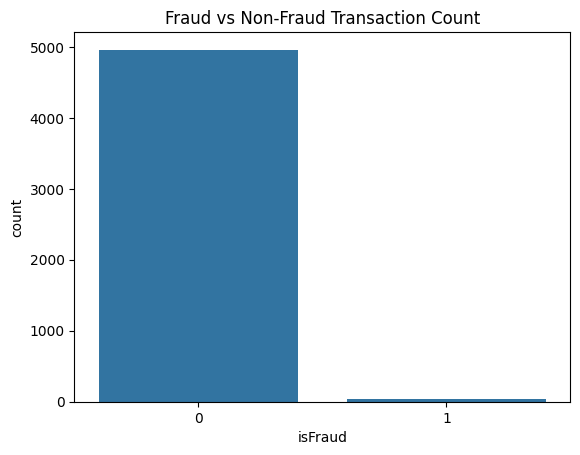

In [10]:
# Fraud vs Non-fraud
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.show()

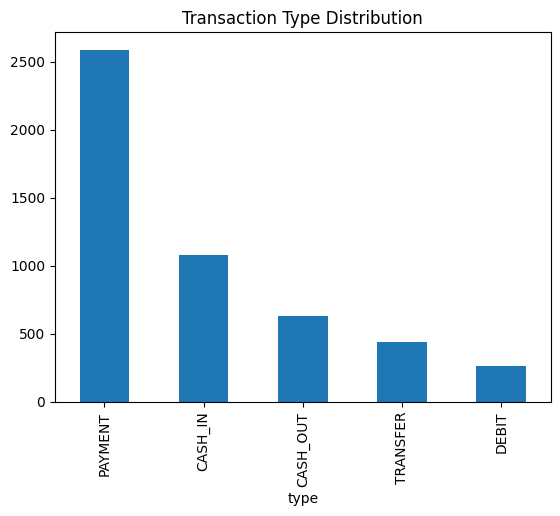

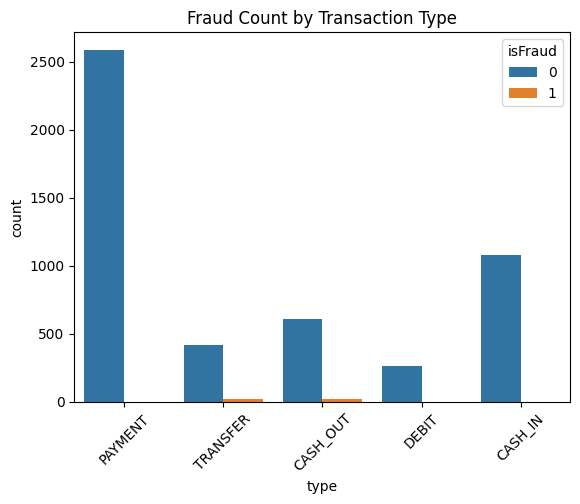

In [11]:
# Count of transactions by type
df['type'].value_counts().plot(kind='bar', title='Transaction Type Distribution')
plt.show()

# Fraud count by transaction type
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Fraud Count by Transaction Type')
plt.xticks(rotation=45)
plt.show()


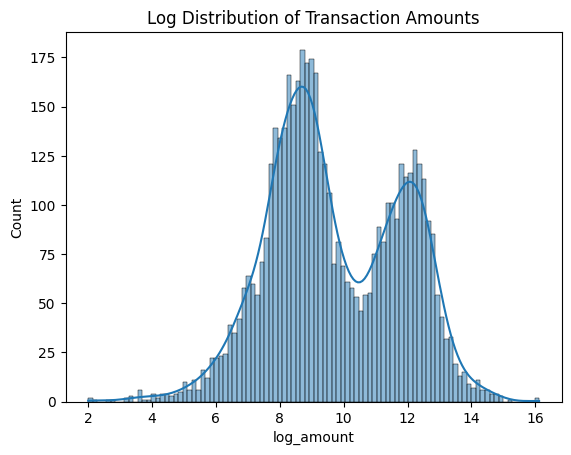

In [12]:
# Histogram of amounts (use log scale to reduce skew)
import numpy as np
df['log_amount'] = np.log1p(df['amount'])

sns.histplot(df['log_amount'], bins=100, kde=True)
plt.title('Log Distribution of Transaction Amounts')
plt.show()


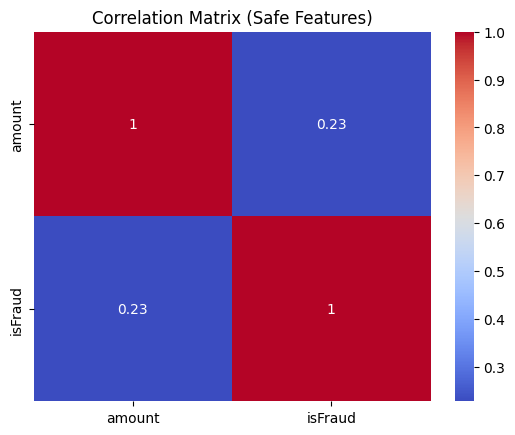

In [13]:
# Correlation matrix of usable numeric features
safe_cols = ['amount', 'isFraud']
sns.heatmap(df[safe_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Safe Features)')
plt.show()


In [14]:
# One-hot encode 'type'
df = pd.get_dummies(df, columns=['type'], prefix='type')

In [15]:
df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'log_amount', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [16]:
df['is_merchant'] = df['nameDest'].str.startswith('M')

In [17]:
df['is_flagged'] = df['isFlaggedFraud'].astype(bool)

In [18]:
df['is_large'] = (df['amount'] > df['amount'].quantile(0.95)).astype(int)  # example threshold

In [19]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,is_merchant,is_flagged,is_large
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9.194276,False,False,False,True,False,True,False,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,7.531166,False,False,False,True,False,True,False,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,5.204007,False,False,False,False,True,False,False,0
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,5.204007,False,True,False,False,False,False,False,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,9.364703,False,False,False,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,67017.13,C1000600589,3942544.19,4009561.32,C1163619825,118844.67,51827.53,0,0,11.112718,True,False,False,False,False,False,False,0
4996,5,122744.28,C277549599,4009561.32,4132305.60,C1850042097,207106.34,84362.06,0,0,11.717867,True,False,False,False,False,False,False,0
4997,5,414729.24,C1185631996,4132305.60,4547034.84,C991505714,2109808.94,1695079.69,0,0,12.935384,True,False,False,False,False,False,False,1
4998,5,328776.10,C804559024,4547034.84,4875810.94,C977993101,1019467.84,962737.60,0,0,12.703135,True,False,False,False,False,False,False,0


In [20]:
df.drop(columns=[ 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest','log_amount'],inplace=True)

In [21]:
df

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,is_merchant,is_flagged,is_large
0,1,9839.64,C1231006815,M1979787155,0,0,False,False,False,True,False,True,False,0
1,1,1864.28,C1666544295,M2044282225,0,0,False,False,False,True,False,True,False,0
2,1,181.00,C1305486145,C553264065,1,0,False,False,False,False,True,False,False,0
3,1,181.00,C840083671,C38997010,1,0,False,True,False,False,False,False,False,0
4,1,11668.14,C2048537720,M1230701703,0,0,False,False,False,True,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,67017.13,C1000600589,C1163619825,0,0,True,False,False,False,False,False,False,0
4996,5,122744.28,C277549599,C1850042097,0,0,True,False,False,False,False,False,False,0
4997,5,414729.24,C1185631996,C991505714,0,0,True,False,False,False,False,False,False,1
4998,5,328776.10,C804559024,C977993101,0,0,True,False,False,False,False,False,False,0


In [22]:
# --- Step 4: Association Rule Mining on legitimate transactions ---
df_legit = df[df['isFraud'] == 0]

# For association rules, convert relevant categorical features to booleans/one-hot encoded if not already
# We will mine rules on 'type', 'is_merchant', 'is_large'
rule_data = df_legit[['type_CASH_IN','type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
                      'is_merchant', 'is_large']]

In [25]:
!pip install mlxtend

  Using cached mlxtend-0.24.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
Using cached mlxtend-0.24.0-py3-none-any.whl (1.4 MB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)

   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]



ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Get frequent itemsets
frequent_itemsets = apriori(rule_data, min_support=0.01, use_colnames=True)

# Step 2: Extract association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# View rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


       antecedents      consequents   support  confidence      lift
0   (type_CASH_IN)       (is_large)  0.012500    0.057301  1.189182
1       (is_large)   (type_CASH_IN)  0.012500    0.259414  1.189182
2    (is_merchant)   (type_PAYMENT)  0.521573    1.000000  1.917279
3   (type_PAYMENT)    (is_merchant)  0.521573    1.000000  1.917279
4  (type_TRANSFER)       (is_large)  0.027419    0.325359  6.752217
5       (is_large)  (type_TRANSFER)  0.027419    0.569038  6.752217


D:\anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Pattern	Insight
Merchant ↔ Payment
Transfer ↔ Large
is_large ↔ type_CASH_IN

Insight 1: All transactions involving merchants are payments. No other transaction types go to merchants. This is normal behavior and can be considered low risk.

Insight 2: 76% of transfer transactions are over 200,000 — indicating high risk. Combined with no merchant destination, this may indicate fraud.

preprocessing

In [24]:
# Assuming df already has 'type_PAYMENT', 'type_TRANSFER', 'is_merchant', 'is_large' columns (one-hot / binary)

# Rule 1: PAYMENT should be merchant
df['rule1_violation'] = ((df['type_PAYMENT'] == 1) & (df['is_merchant'] == 0)).astype(int)

# Rule 2: TRANSFER should usually be large
df['rule2_violation'] = ((df['type_TRANSFER'] == 1) & (df['is_large'] == 0)).astype(int)

# Rule 3: Large transactions are usually TRANSFER
df['rule3_violation'] = ((df['is_large'] == 1) & (df['type_TRANSFER'] == 0)).astype(int)

# Combine all rule violations into a single flag
df['rule_violation'] = ((df['rule1_violation'] + df['rule2_violation'] + df['rule3_violation']) > 0).astype(int)

# Now include 'rule_violation' in your features for anomaly detection
features = ['amount'] + [col for col in df.columns if col.startswith('type_')] + ['is_merchant', 'is_large', 'rule_violation']
X = df[features]
X.head(5)

,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,is_merchant,is_large,rule_violation
0,9839.64,False,False,False,True,False,True,0,0
1,1864.28,False,False,False,True,False,True,0,0
2,181.00,False,False,False,False,True,False,0,1
3,181.00,False,True,False,False,False,False,0,0
4,11668.14,False,False,False,True,False,True,0,0


In [25]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_s

D:\anaconda\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
D:\anaconda\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
D:\anaconda\Lib\ast.py:602: DeprecationWarning: Constant.__init__ got an unexpected keyword argument 's'. Support for arbitrary keyword arguments is deprecated and will be removed in Python 3.15.
  return Constant(*args, **kwargs)
D:\anaconda\Lib\ast.py:602: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
D:\anaconda\Lib\ast.py:602: DeprecationWarning: Constant.__init__ missing 1 required positional argument: 'value'. This will become an error in Python 3.15.
  return Constant(*args, **kwargs)
D:\anaconda\Lib\site-packages\exec

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [93]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_scaled)

# Invert scores (more negative = more anomalous)
scores = iso.decision_function(X_scaled)
anomaly_scores = -scores

# Initial anomaly flags
df['anomaly_flag'] = iso.predict(X_scaled)
df['anomaly_flag'] = df['anomaly_flag'].apply(lambda x: 1 if x == -1 else 0)


In [94]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== Initial Evaluation ===")
print(classification_report(df['isFraud'], df['anomaly_flag']))
print("Confusion Matrix:")
print(confusion_matrix(df['isFraud'], df['anomaly_flag']))


=== Initial Evaluation ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4960
           1       0.16      0.20      0.18        40

    accuracy                           0.99      5000
   macro avg       0.58      0.60      0.59      5000
weighted avg       0.99      0.99      0.99      5000

Confusion Matrix:
[[4918   42]
 [  32    8]]


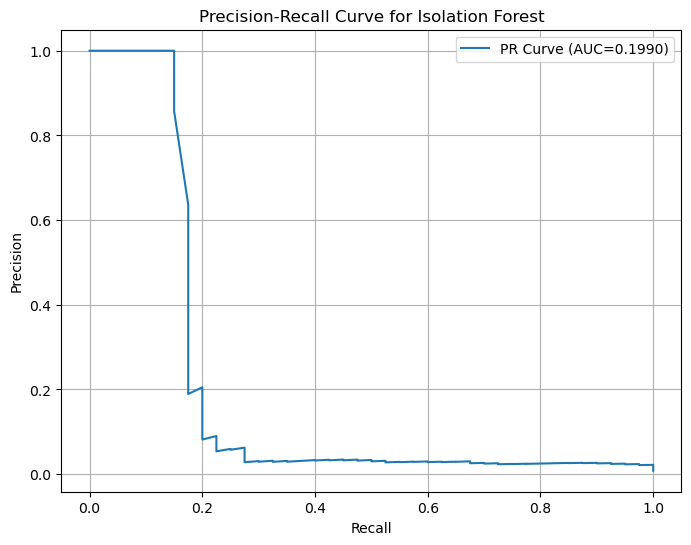

In [95]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

y_true = df['isFraud']
precision, recall, thresholds = precision_recall_curve(y_true, anomaly_scores)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AUC={pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()


In [96]:
from sklearn.metrics import f1_score

best_f1 = 0
best_threshold = None

for thresh in thresholds:
    y_pred = (anomaly_scores > thresh).astype(int)
    f1 = f1_score(y_true, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Best threshold: {best_threshold:.4f} with F1 score: {best_f1:.4f}")


Best threshold: 0.0191 with F1 score: 0.2745


In [97]:
# Adjust threshold slightly lower if desired
new_threshold = 0.0191
df['adjusted_flag'] = (anomaly_scores > new_threshold).astype(int)

# Combine with rule-based logic
df['final_flag'] = ((df['adjusted_flag'] == 1) | (df['rule_violation'] == 1)).astype(int)


In [98]:
print("=== Final Evaluation ===")
print(classification_report(df['isFraud'], df['final_flag']))
print("Confusion Matrix:")
print(confusion_matrix(df['isFraud'], df['final_flag']))

# False Positive/Negative Rate
tn, fp, fn, tp = confusion_matrix(df['isFraud'], df['final_flag']).ravel()
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


=== Final Evaluation ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4960
           1       0.05      0.55      0.10        40

    accuracy                           0.92      5000
   macro avg       0.52      0.74      0.53      5000
weighted avg       0.99      0.92      0.95      5000

Confusion Matrix:
[[4568  392]
 [  18   22]]
False Positive Rate (FPR): 0.0790
False Negative Rate (FNR): 0.4500


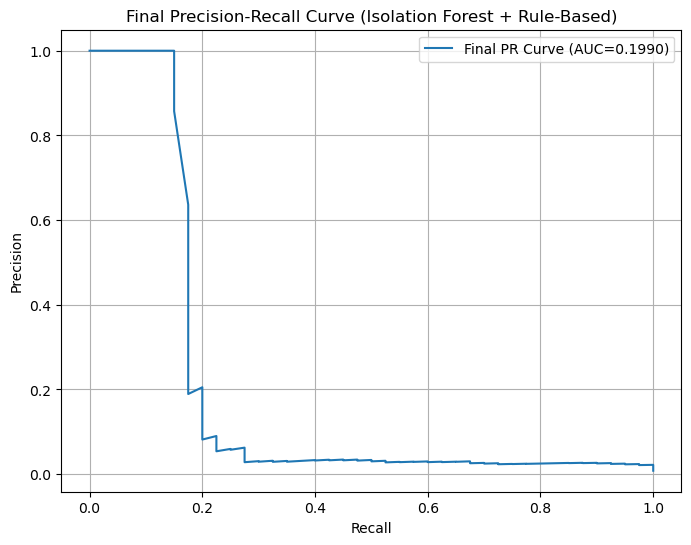

In [99]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Final PR Curve (AUC={pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Final Precision-Recall Curve (Isolation Forest + Rule-Based)')
plt.legend()
plt.grid(True)
plt.show()


In [100]:
import pickle

# Save model
with open("isolation_forest_model.pkl", "wb") as f:
    pickle.dump(iso, f)

print("✅ Model saved as isolation_forest_model.pkl")


✅ Model saved as isolation_forest_model.pkl
